In [ ]:
# Check out the YouTube channel and tutorials for this notebook at <a href="">

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Load the dataset

In [2]:
digits = datasets.load_digits()

In [3]:
X_data = digits.images
y_data = digits.target

In [4]:
X_data.shape

(1797, 8, 8)

### Look at some example images

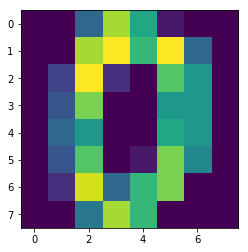

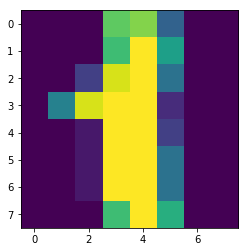

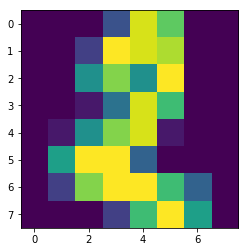

In [9]:
for i in range(3):
    plt.show(plt.imshow(X_data[i]))

In [20]:
X_data = X_data.reshape(-1, 64)

In [21]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
y_data

array([0, 1, 2, ..., 8, 9, 8])

### Transform y data to one hot format

In [23]:
enc = OneHotEncoder()
y_data = enc.fit_transform(y_data.reshape(-1, 1)).todense()

In [25]:
y_data

matrix([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  1.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)

In [2]:
model = Sequential()

### Add the layers of our model

In [3]:
model.add(Dense(units=64, activation='relu', input_dim=64))
model.add(Dense(units=10, activation='softmax'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 4,810
Trainable params: 4,810
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Train the model

In [57]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1347/1347 [==============================] - 0s 101us/step - loss: 0.0311 - acc: 0.9933
Epoch 2/5
1347/1347 [==============================] - 0s 77us/step - loss: 0.0295 - acc: 0.9941
Epoch 3/5
1347/1347 [==============================] - 0s 73us/step - loss: 0.0284 - acc: 0.9941
Epoch 4/5
1347/1347 [==============================] - 0s 73us/step - loss: 0.0275 - acc: 0.9941
Epoch 5/5
1347/1347 [==============================] - 0s 77us/step - loss: 0.0269 - acc: 0.9948


### Final metrics

In [58]:
metrics = model.evaluate(X_test, y_test, batch_size=32)

450/450 [==============================] - 0s 46us/step


In [59]:
print("Loss:", metrics[0], "| Accuracy:", metrics[1])

Loss: 0.0213050520213 | Accuracy: 0.995555555556
